# **Loading (Libraries, CSV)**

In [0]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#curve fit
from scipy.optimize import curve_fit

# design plots
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [118]:
file = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete (2).csv


In [119]:
df = pd.read_csv('covid_19_clean_complete.csv')
df.drop(columns=['Province/State','Lat','Long','Deaths','Recovered'],inplace=True)
df.rename(columns={'Country/Region':'Country'},inplace=True)
df

,Country,Date,Confirmed
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
25671,France,4/28/20,1
25672,South Sudan,4/28/20,34
25673,Western Sahara,4/28/20,6
25674,Sao Tome and Principe,4/28/20,8


# **Brazil Dataset**

In [120]:
brazil = df.loc[df['Country'] == 'Brazil'] #defining ds to Brazil
brazil.sort_values(by=['Confirmed','Date'],ascending=True,inplace=True) #ordering
brazil = brazil[df['Confirmed'] >= 150].iloc[:39]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


# **Argentina Dataset**

In [121]:
argentina = df.loc[df['Country'] == 'Argentina'] #defining ds to Argentina
argentina.sort_values(by=['Confirmed','Date'],ascending=True,inplace=True) #ordering
argentina = argentina[df['Confirmed'] >= 150].iloc[:39]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


# **Data Analysis**

In [122]:
'''

*** Definições ***

— Ambos os datasets possuem len(39), ou seja: a análise dos dados condenada ao redimensinamento dos dados (85% do dataset treino e 15% teste) vai ser feito de acordo com esse número
logo: 
training_size = 0.80 * 39 approx -> 33 linhas de treino
test_size = 39 - treino approx -> 7 linhas de teste

'''

'\n\n*** Definições ***\n\n— Ambos os datasets possuem len(39), ou seja: a análise dos dados condenada ao redimensinamento dos dados (85% do dataset treino e 15% teste) vai ser feito de acordo com esse número\nlogo: \ntraining_size = 0.80 * 39 approx -> 33 linhas de treino\ntest_size = 39 - treino approx -> 7 linhas de teste\n\n'

In [0]:
t_list = []
for i in range(0,39):
  t_list.append(i)
brazil['t'] = t_list
argentina['t'] = t_list

In [0]:
brazil_training = brazil.iloc[:33]
argentina_training = argentina.iloc[:33]

# **Definitions**

*   Definição das funções de predição

In [0]:
def br_malthus(a,t):
  return 151*np.exp(a*t) #151 is a pre-definied constant value on br
  
def ar_malthus(a,t):
  return 158*np.exp(a*t)

def br_ver(a,t,L):
  return (L*151)/((L-151)*np.exp(-1*a*t)+151)

def ar_ver(a,t,L):
  return (L*158)/((L-158)*np.exp(-1*a*t)+158)

# **Analysis on Brazil**

In [145]:
# Malthus (BR)

br_malthus_popt, br_malthus_pcov = curve_fit(br_malthus,brazil_training['t'],brazil_training['Confirmed'])# calculating coefficient a
br_malthus_a = br_popt
br_malthus_deva = np.sqrt(np.diag(br_pcov))
print("a = %6.2f +- %.4f" %(br_malthus_a, br_malthus_deva))

a =   0.17 +- 0.0016


In [148]:
# Verhulst (BR)

br_ver_popt, br_ver_pcov = curve_fit(br_ver,brazil['t'],brazil['Confirmed']) # calculating coefficients a,L (0.85 of data wasnt enough)
br_ver_a, br_ver_L = br_ver_popt
br_ver_deva, br_ver_devL = np.sqrt(np.diag(br_ver_pcov))
print("a = %6.2f +- %6.4f\nL = %6.2f +- %6.2f"%(br_ver_a,br_ver_deva,br_ver_L,br_ver_devL))

a =   0.19 +- 0.0020
L = 46291.20 +- 1562.14


In [149]:
brazil_training['Malthus'] = br_malthus(br_malthus_a,brazil_training['t']).round() # creating column Malthus
brazil_training['Verhulst'] = br_ver(br_ver_a,brazil_training['t'],br_ver_L,).round() # creating column Verhulst

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [150]:
brazil_training.head() # overview on new dataset

,Country,Date,Confirmed,t,Malthus,Verhulst
13390,Brazil,3/13/20,151,0,151.0,151.0
13652,Brazil,3/14/20,151,1,178.0,183.0
13914,Brazil,3/15/20,162,2,211.0,221.0
14176,Brazil,3/16/20,200,3,249.0,268.0
14438,Brazil,3/17/20,321,4,295.0,325.0


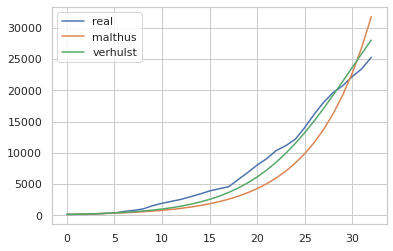

In [151]:
# Plot

plt.plot(brazil_training['t'],brazil_training['Confirmed'],label='real')
plt.plot(brazil_training['t'],brazil_training['Malthus'],label='malthus')
plt.plot(brazil_training['t'],brazil_training['Verhulst'],label='verhulst')
plt.legend()
plt.show()

# **Analysis on Argentina**

In [154]:
# Malthus (AR)

ar_malthus_popt, ar_malthus_pcov = curve_fit(ar_malthus,argentina_training['t'],argentina_training['Confirmed'])# calculating coefficient a
ar_malthus_a = ar_malthus_popt
ar_malthus_deva = np.sqrt(np.diag(ar_malthus_pcov))
print("a = %6.2f +- %.4f" %(ar_malthus_a, ar_malthus_deva))

a =   0.10 +- 0.0020


In [163]:
# Verhulst (BR)

ar_ver_popt, ar_ver_pcov = curve_fit(ar_ver,argentina_training['t'],argentina_training['Confirmed']) # calculating coefficients a,L (0.85 of data wasnt enough)
ar_ver_a, ar_ver_L = ar_ver_popt
ar_ver_deva, ar_ver_devL = np.sqrt(np.diag(ar_ver_pcov))
print("a = %6.7f +- %6.4f\nL = %6.2f +- %6.2f"%(ar_ver_a,ar_ver_deva,ar_ver_L,ar_ver_devL))

a = -0.0000026 +- 0.0013
L =   0.01 +-   6.71


In [165]:
argentina_training['Malthus'] = ar_malthus(ar_malthus_a,argentina_training['t']).round() # creating column Malthus
argentina_training['Verhulst'] = ar_ver(ar_ver_a,argentina_training['t'],ar_ver_L,).round() # creating column Verhulst

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


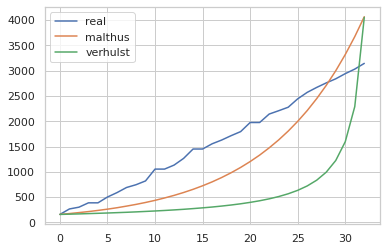

In [167]:
# Plot

plt.plot(argentina_training['t'],argentina_training['Confirmed'],label='real')
plt.plot(argentina_training['t'],argentina_training['Malthus'],label='malthus')
plt.plot(argentina_training['t'],argentina_training['Verhulst'],label='verhulst')
plt.legend()
plt.show()

# **Integrated Analysis**

In [0]:
def br_erro_malthus(t,infec_modelo):
  return t*infec_modelo*br_malthus_deva

def ar_erro_malthus(t,infec_modelo):
  return t*infec_modelo*ar_malthus_deva

def erro_e(infec_real,infec_modelo):
  return 100*(np.absolute(infec_real - infec_modelo)/(infec_real))

def br_z_score(infec_real,infec_modelo,erro_malthus):
  return np.divide(np.absolute(infec_real - infec_modelo),erro_malthus)

def ar_z_score(infec_real,infec_modelo,erro_malthus):
  return np.divide(np.absolute(infec_real - infec_modelo),erro_malthus)

In [0]:
# Brazil Metrics (Uxinfec, Estimated Error, Z-Score)

brazil_training['Uxinfec'] = br_erro_malthus(brazil_training['t'],brazil_training['Malthus'])
brazil_training['erro estimado (%)'] = (100*(np.absolute(brazil_training['Confirmed'] - brazil_training['Malthus']))/brazil_training['Confirmed']).round(2)
brazil_training['Z-Score'] = br_z_score(brazil_training['Confirmed'],brazil_training['Malthus'],brazil_training['erro estimado (%)'])

# Argentina Metrics (Uxinfec, Estimated Error, Z-Score)

argentina_training['Uxinfec'] = br_erro_malthus(argentina_training['t'],argentina_training['Malthus'])
argentina_training['erro estimado (%)'] = (100*(np.absolute(argentina_training['Confirmed'] - argentina_training['Malthus']))/argentina_training['Confirmed']).round(2)
argentina_training['Z-Score'] = br_z_score(argentina_training['Confirmed'],argentina_training['Malthus'],argentina_training['erro estimado (%)'])

In [0]:
brazil_training = brazil_training[['Country','Date','t','Confirmed','Malthus','erro estimado (%)','Z-Score','Verhulst']]
argentina_training = argentina_training[['Country','Date','t','Confirmed','Malthus','erro estimado (%)','Z-Score','Verhulst']]

In [235]:
brazil_training.head(20)

,Country,Date,t,Confirmed,Malthus,erro estimado (%),Z-Score,Verhulst
13390,Brazil,3/13/20,0,151,151.0,0.00,NaN,151.0
13652,Brazil,3/14/20,1,151,178.0,17.88,1.510067,183.0
13914,Brazil,3/15/20,2,162,211.0,30.25,1.619835,221.0
14176,Brazil,3/16/20,3,200,249.0,24.50,2.000000,268.0
14438,Brazil,3/17/20,4,321,295.0,8.10,3.209877,325.0
14700,Brazil,3/18/20,5,372,348.0,6.45,3.720930,393.0
14962,Brazil,3/19/20,6,621,412.0,33.66,6.209150,475.0
15224,Brazil,3/20/20,7,793,487.0,38.59,7.929515,574.0
15486,Brazil,3/21/20,8,1021,575.0,43.68,10.210623,694.0
15748,Brazil,3/22/20,9,1546,680.0,56.02,15.458765,839.0


In [230]:
argentina_training.head(20)

,Country,Date,t,Confirmed,Malthus,erro estimado (%),Z-Score,Verhulst
15464,Argentina,3/21/20,0,158,158.0,0.00,NaN,158.0
15726,Argentina,3/22/20,1,266,175.0,34.21,2.660041,163.0
15988,Argentina,3/23/20,2,301,194.0,35.55,3.009845,168.0
16250,Argentina,3/24/20,3,387,214.0,44.70,3.870246,174.0
16512,Argentina,3/25/20,4,387,237.0,38.76,3.869969,180.0
16774,Argentina,3/26/20,5,502,262.0,47.81,5.019870,186.0
17036,Argentina,3/27/20,6,589,290.0,50.76,5.890465,193.0
17298,Argentina,3/28/20,7,690,322.0,53.33,6.900431,200.0
17560,Argentina,3/29/20,8,745,356.0,52.21,7.450680,208.0
17822,Argentina,3/30/20,9,820,394.0,51.95,8.200192,217.0
